In [1]:
# Import modules
# ipython magic to plot in line
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
#plt.style.use('ggplot')
# better colors (http://stackoverflow.com/questions/8389636/creating-over-20-unique-legend-colors-using-matplotlib)
plt.rcParams.update({'figure.max_open_warning': 0})
import xarray as xr
from astropy.io import ascii
import pytz
# OS interaction
import sys
import os

In [2]:
# Directories
# Path to raw data
file_in   = os.path.normpath(r'F:\Work\e\Data\Obs\Canada_Project_Sites\Nov_2014_snow_storm_data\QC_netcdf\CRHO_Nov_2014_Storm.nc')

In [3]:
# Set font size
font = {'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)

In [4]:
# Import stations of interest
CRHO_data = xr.open_dataset(file_in,engine='netcdf4')

In [5]:
# Sort variables by alpha
AllVars = sorted(CRHO_data.data_vars)

In [6]:
# Remove metadata (and variables that are empty (i.e. diagnostic ones))
[AllVars.remove(cV) for cV in ['Elevation','Lat','Lon']]

[None, None, None]

In [ ]:
CRHO_data

<xarray.Dataset>
Dimensions:                           (station: 12, time: 7201)
Coordinates:
  * station                           (station) object 'BNS' 'BRP' 'BWH' ...
  * time                              (time) datetime64[ns] 2014-10-01 ...
Data variables:
    AirMoistureContentA               (station, time) float64 66.47 67.97 ...
    SoilMoistureE                     (station, time) float64 0.208 0.208 ...
    SoilMoistureB                     (station, time) float64 0.318 0.318 ...
    SoilMoistureD                     (station, time) float64 0.297 0.297 ...
    SoilTemperatureB                  (station, time) float64 4.785 4.766 ...
    DownwardSolarRadiation            (station, time) float64 0.0 0.0 0.0 ...
    UpwardSolarRadiation              (station, time) float64 2.596 2.468 ...
    UpwardTerrestrialRad              (station, time) float64 297.5 297.2 ...
    SoilHeatFluxA                     (station, time) float64 -11.53 -11.42 ...
    SnowDepthA                    

AirMoistureContentA
AirtemperatureA
DownwardSolarRadiation
DownwardTerrestrialRad
IncrementalPrecipitationA
IncrementalPrecipitationB
ScalarWindSpeedA
ScalarWindSpeedB
SnowDepthA
SnowDepthQCvalue
SnowLayerTemperatureA
SnowWaterEquivelentA
SoilHeatFluxA
SoilMoistureA
SoilMoistureB
SoilMoistureC
SoilMoistureD
SoilMoistureE
SoilTemperatureA
SoilTemperatureB
SoilTemperatureC
SoilTemperatureD
SoilTemperatureE
SurfaceTemperatureA
SurfaceTemperatureB
TotalPressureAdjustedtoSea-level
TotalPressureUnadjustedA
UpwardSolarRadiation
UpwardTerrestrialRad
WindDirectionatA


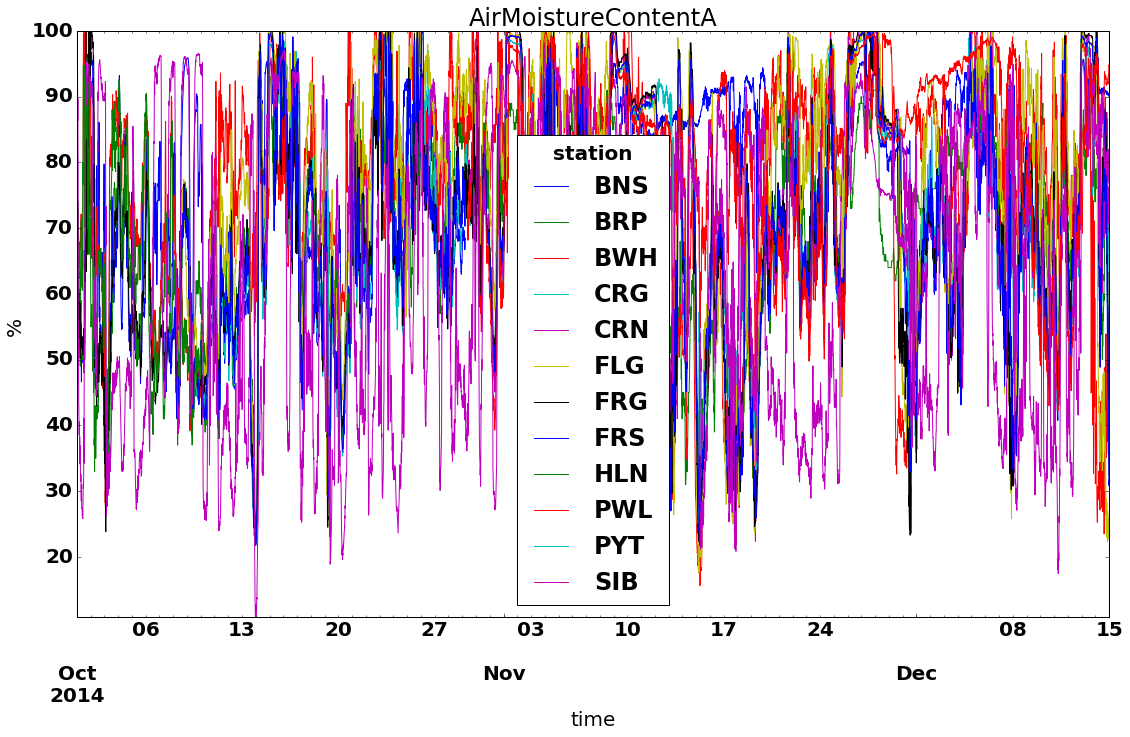

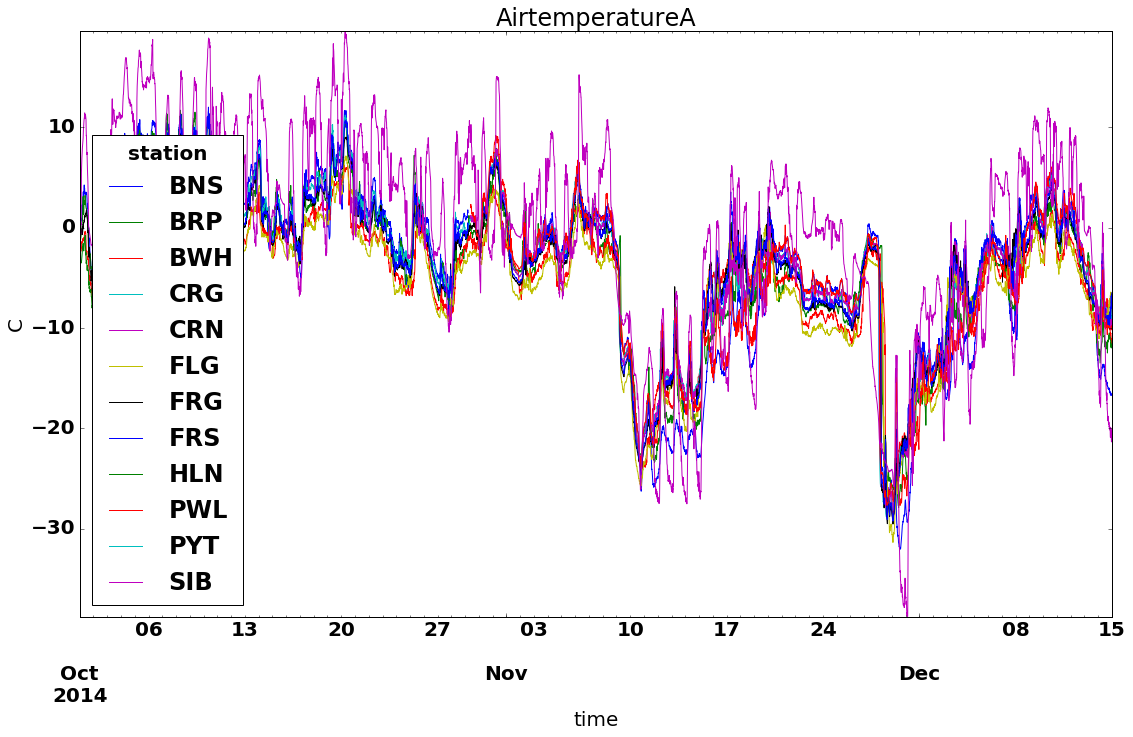

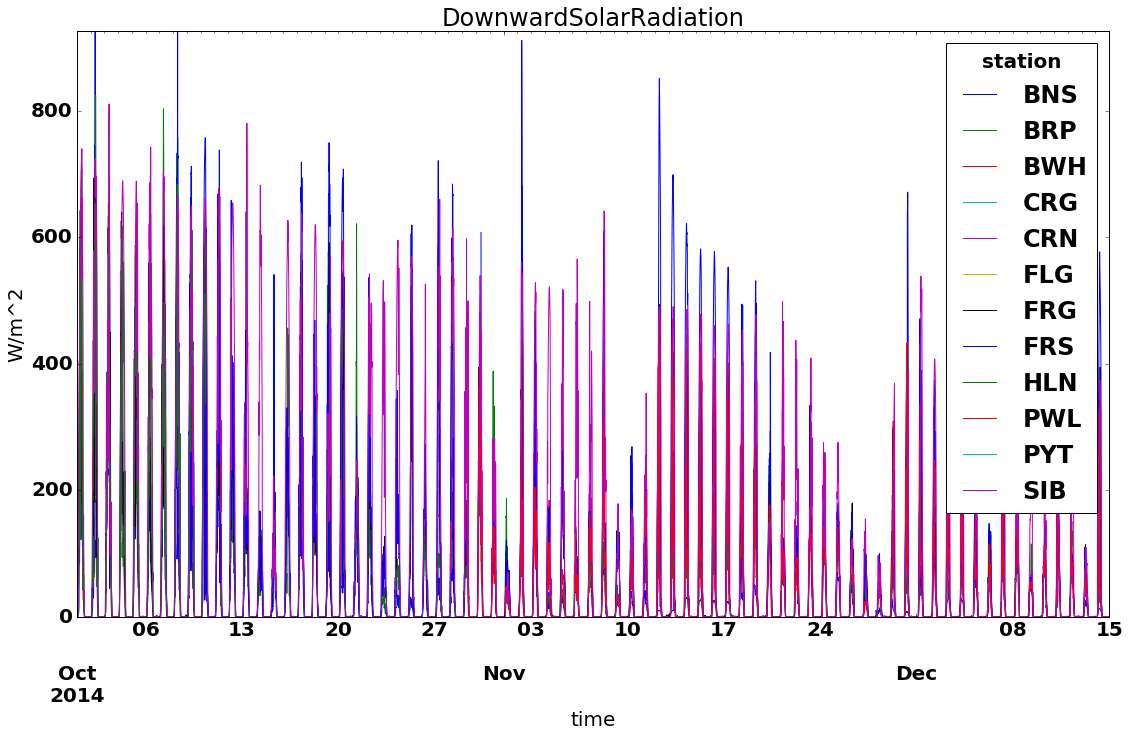

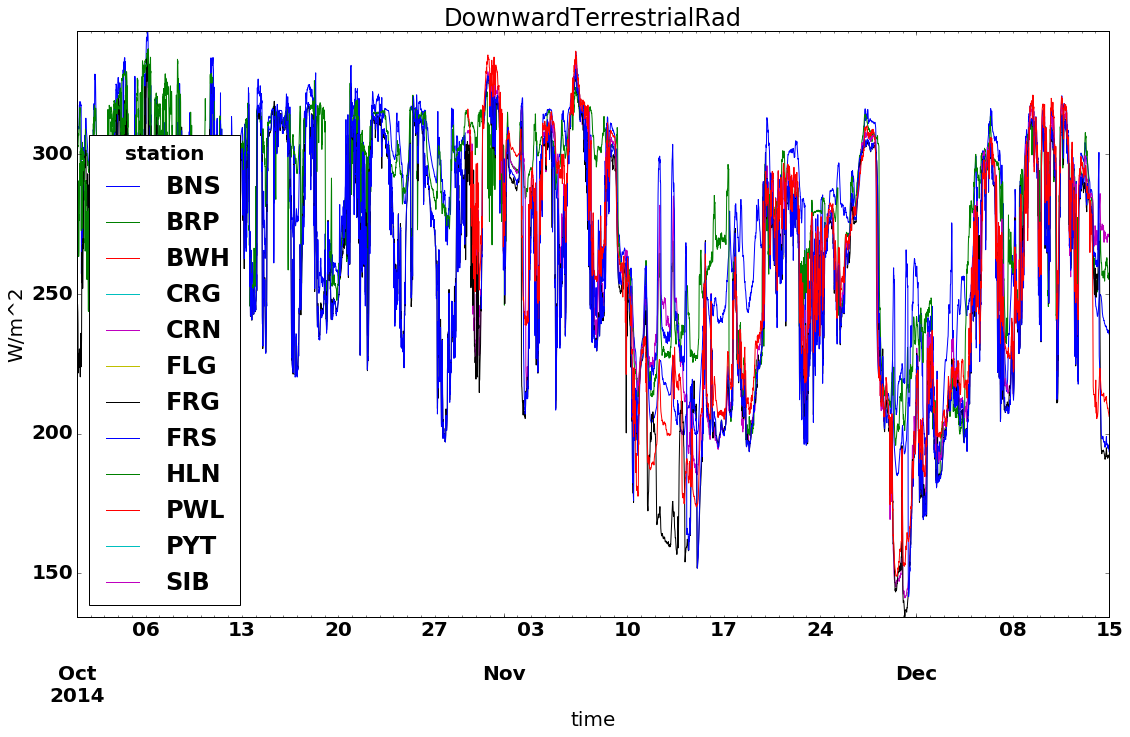

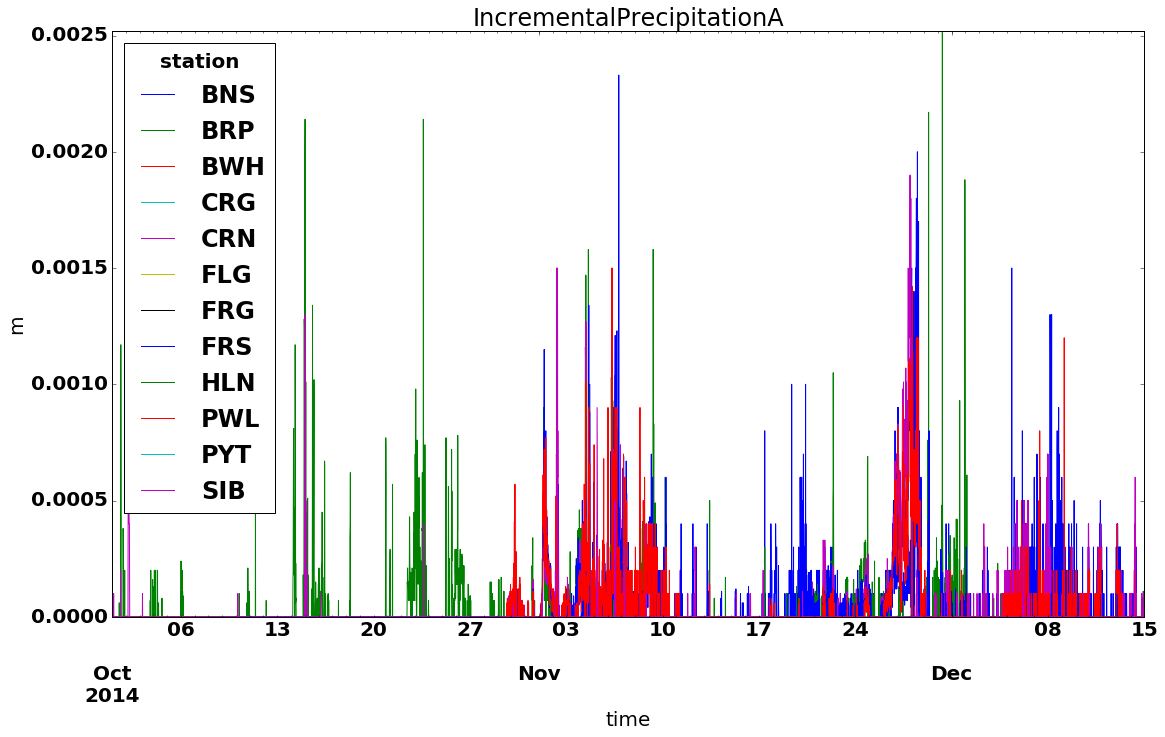

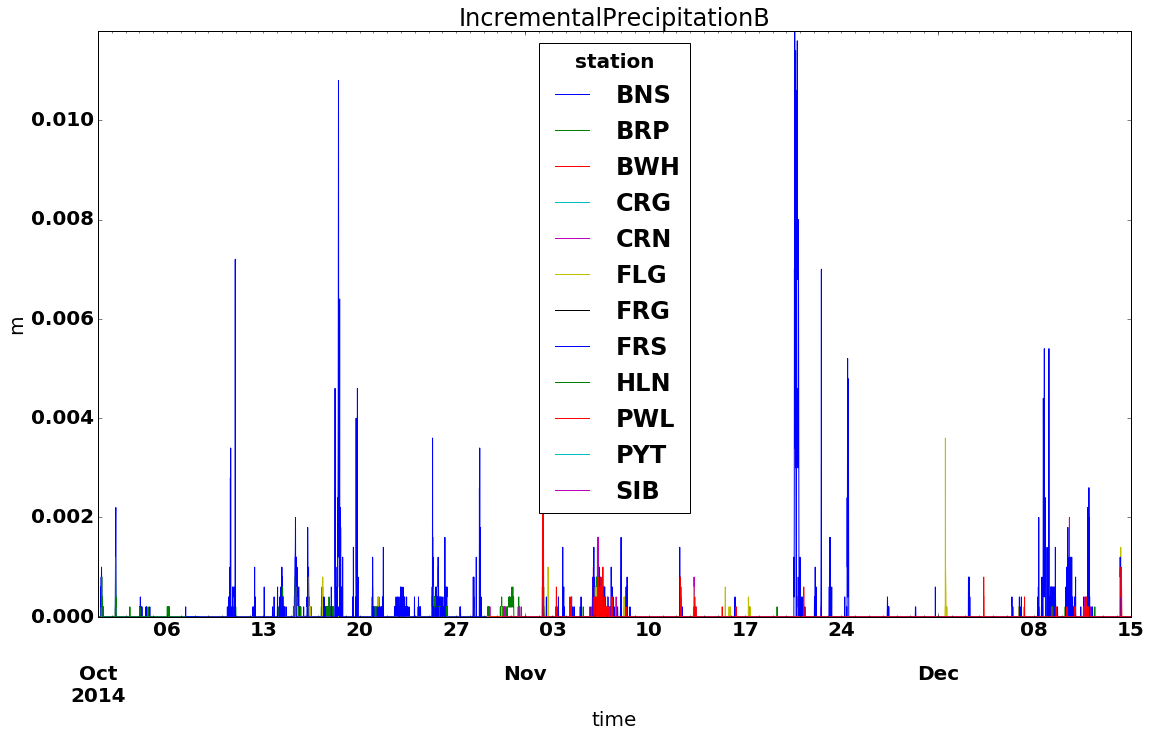

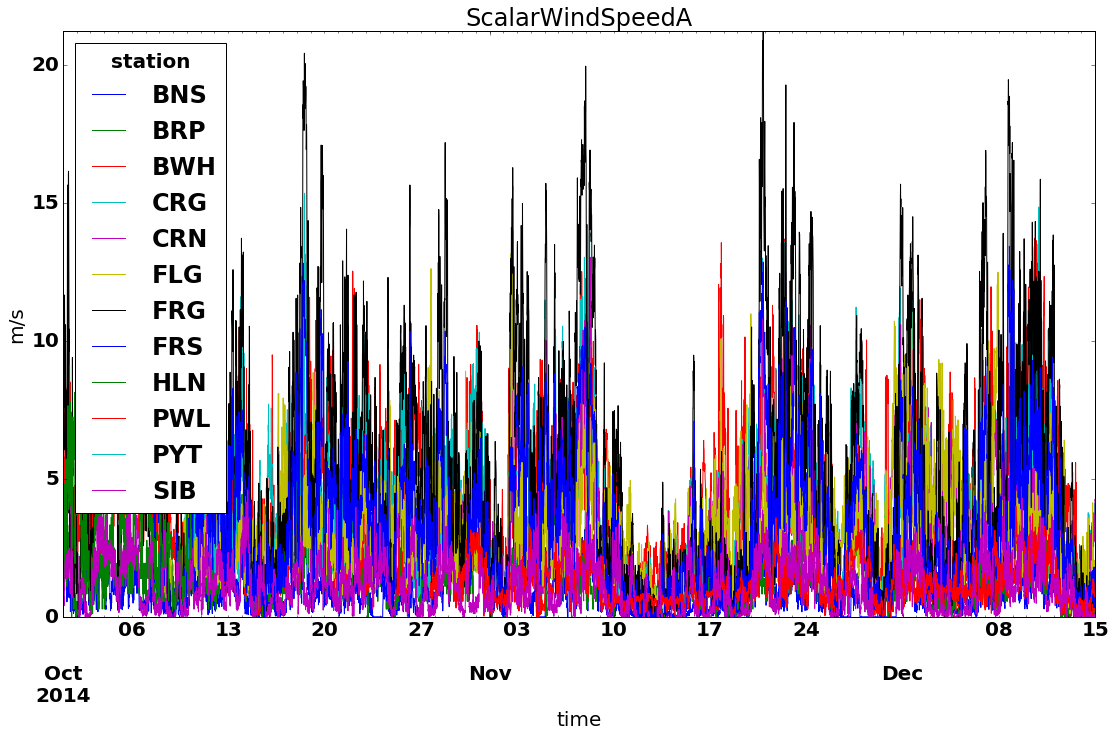

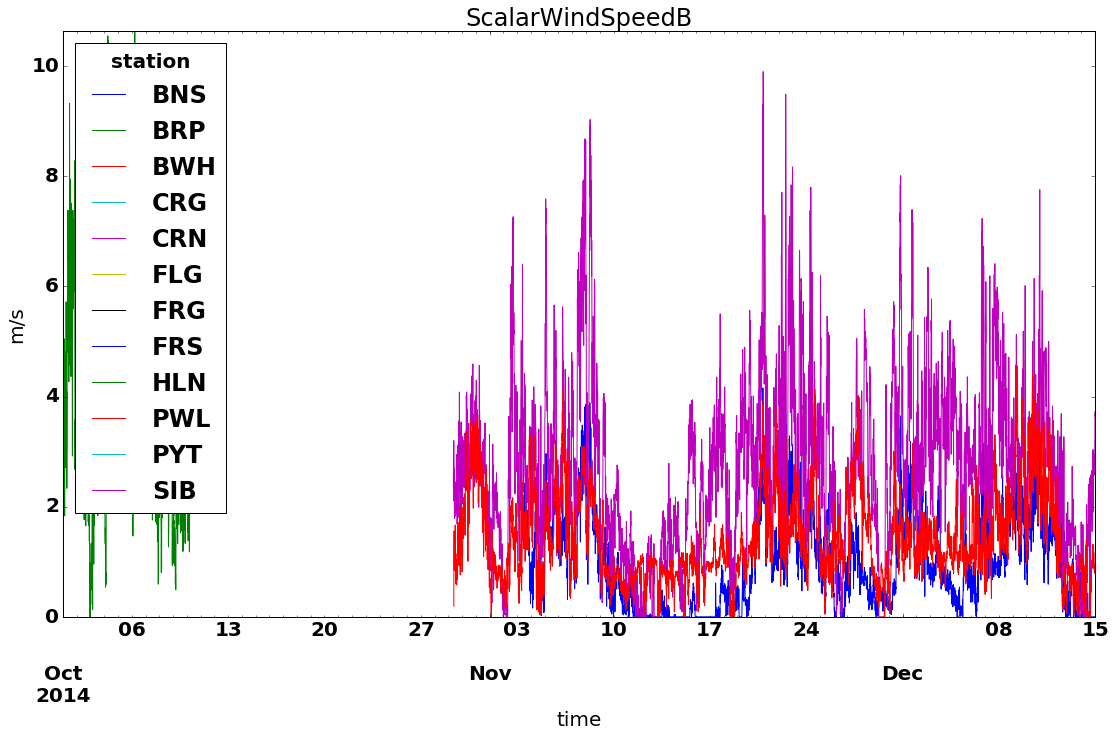

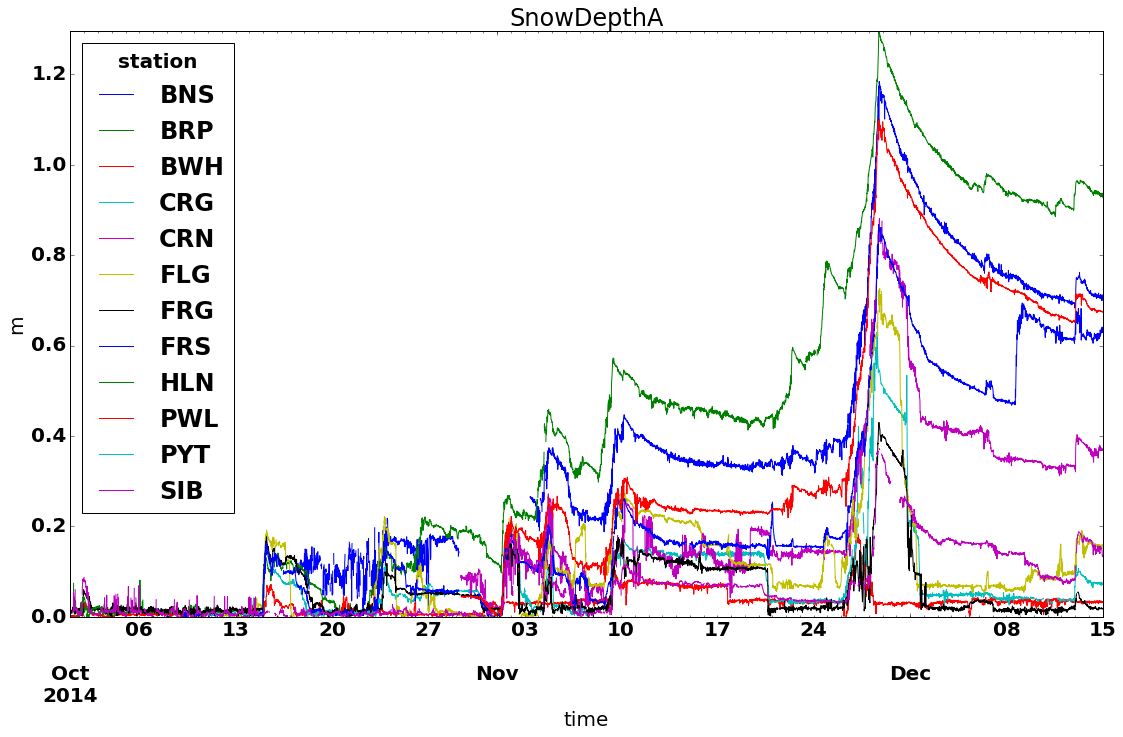

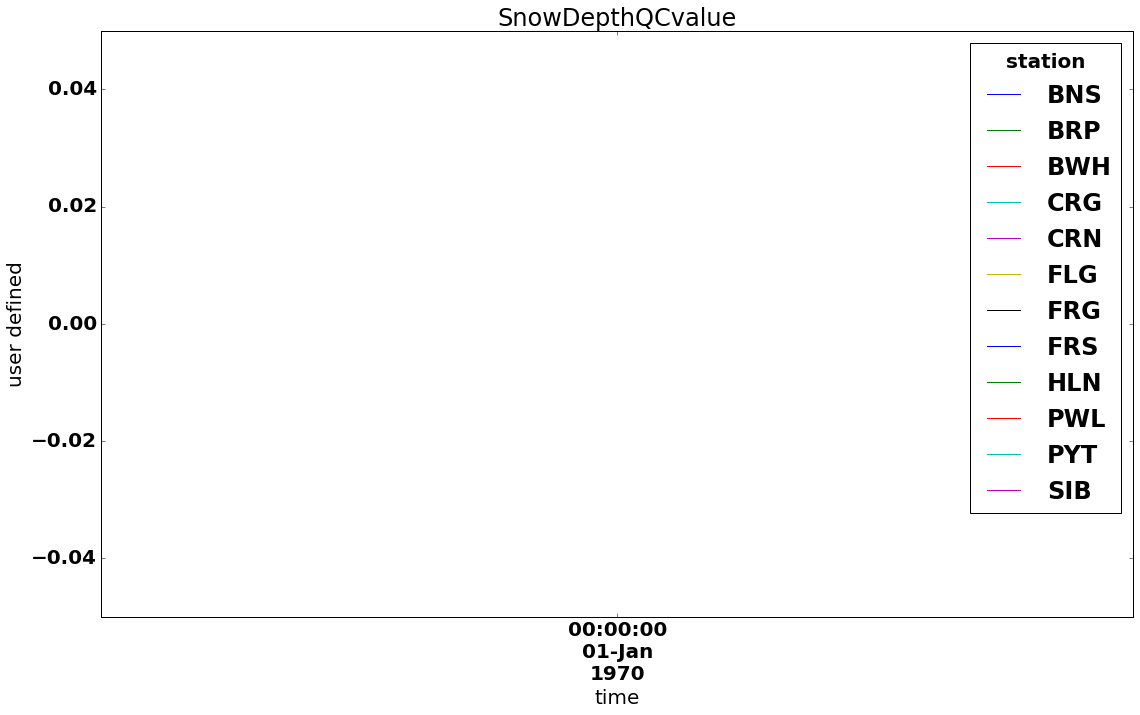

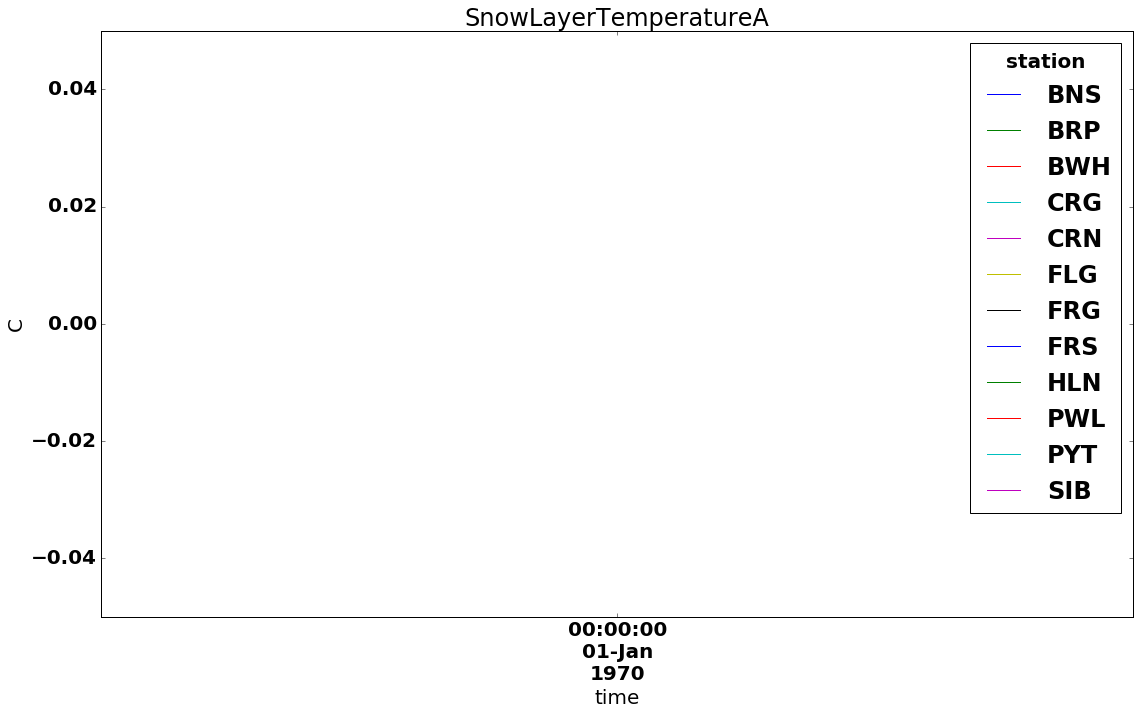

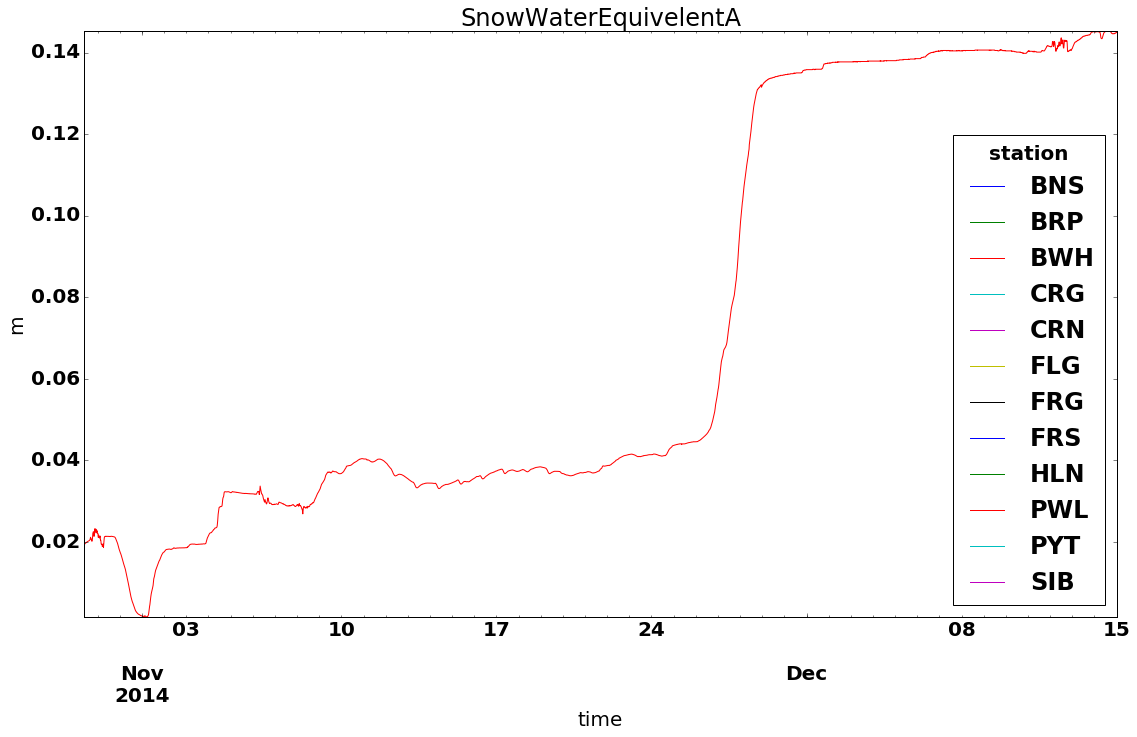

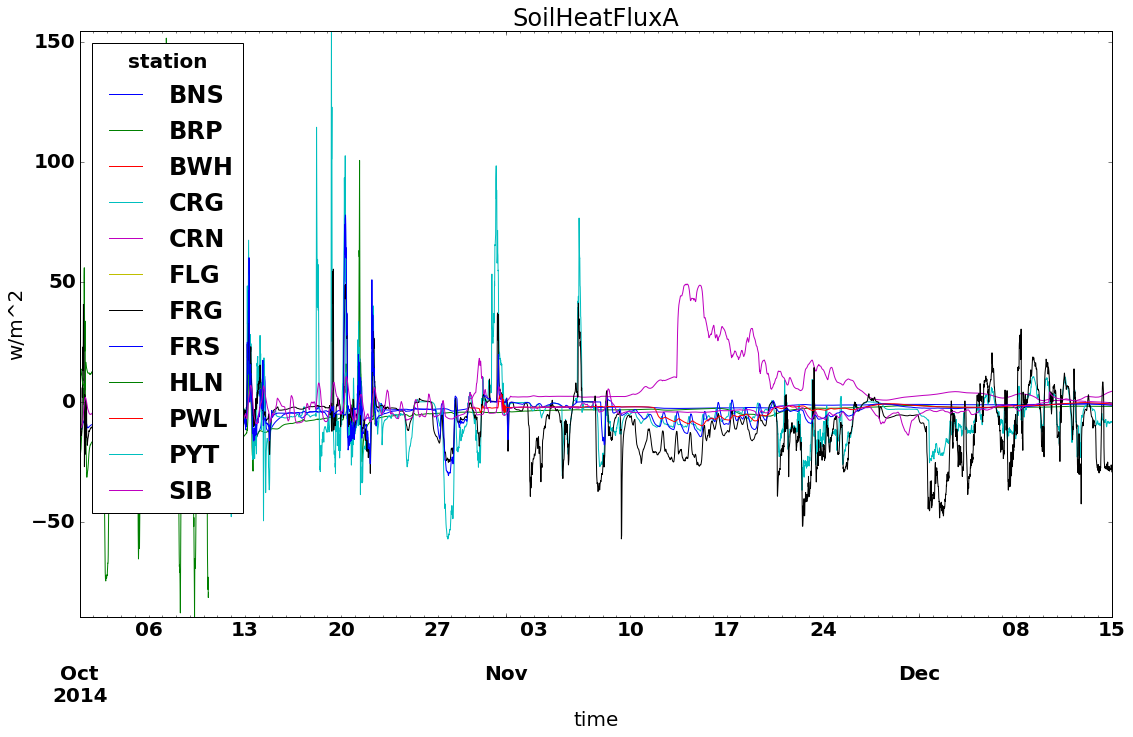

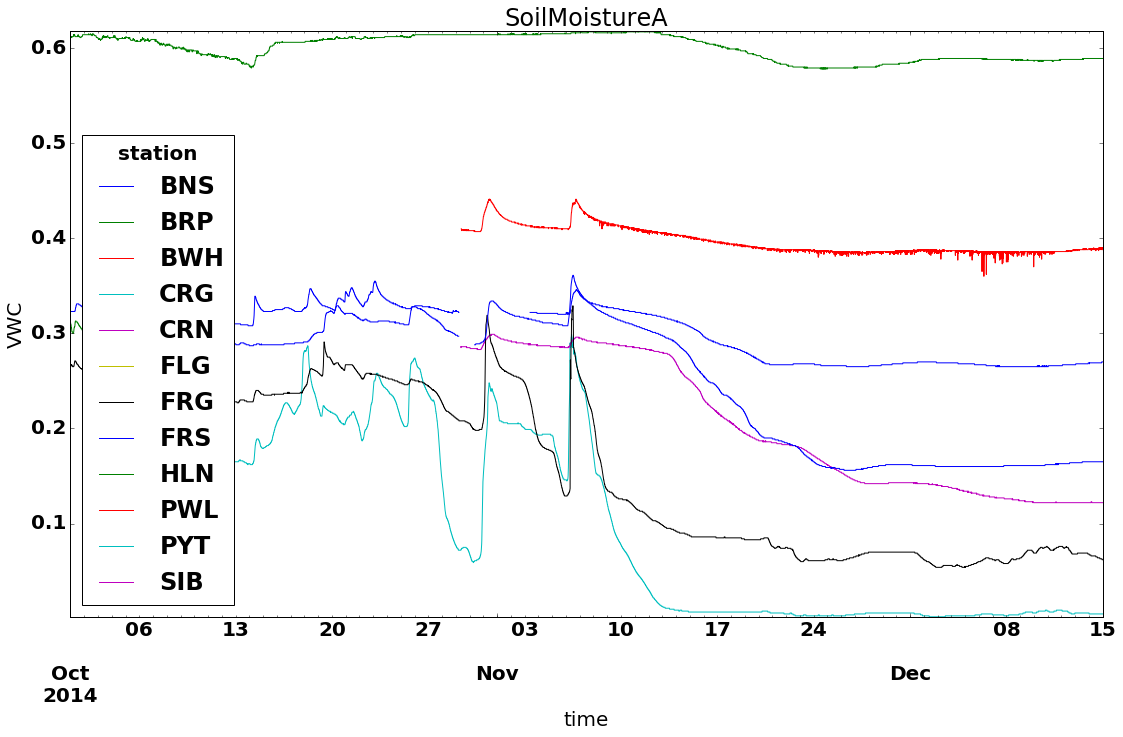

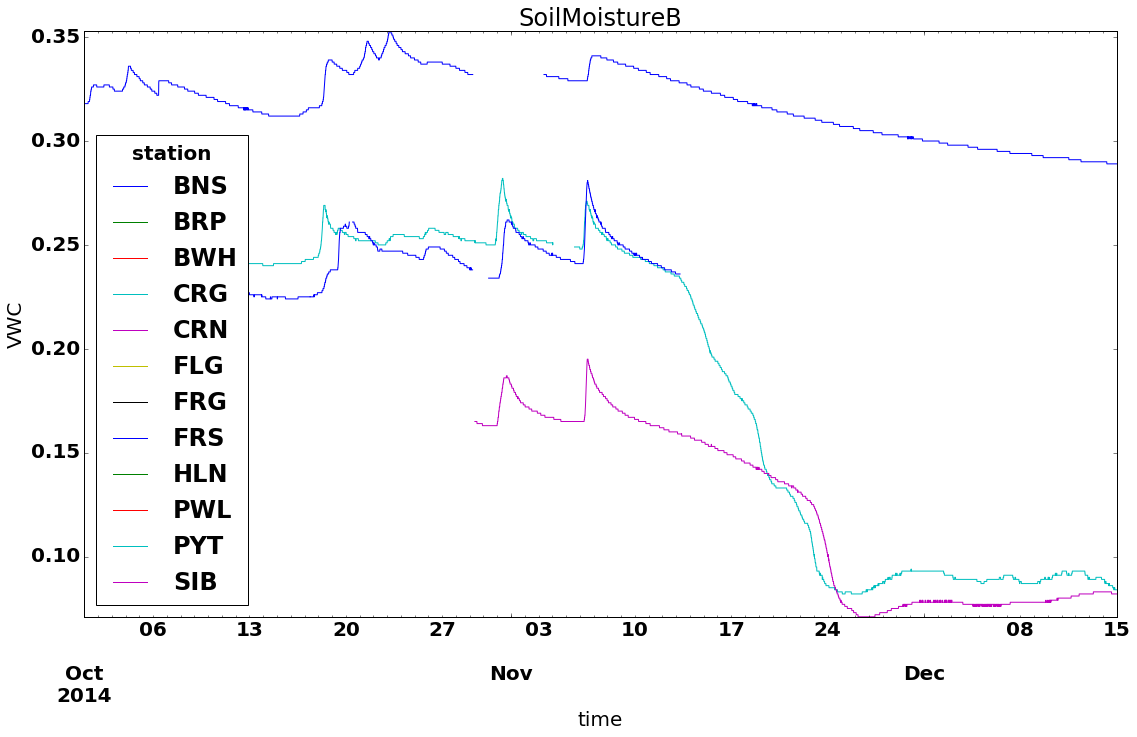

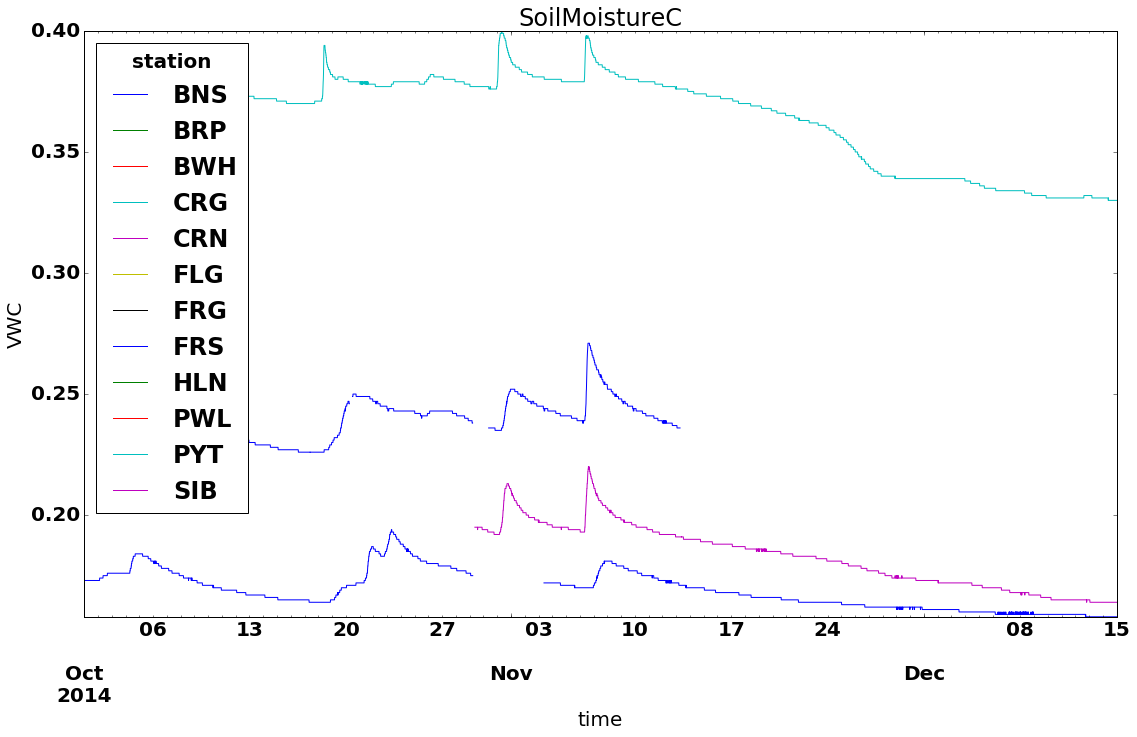

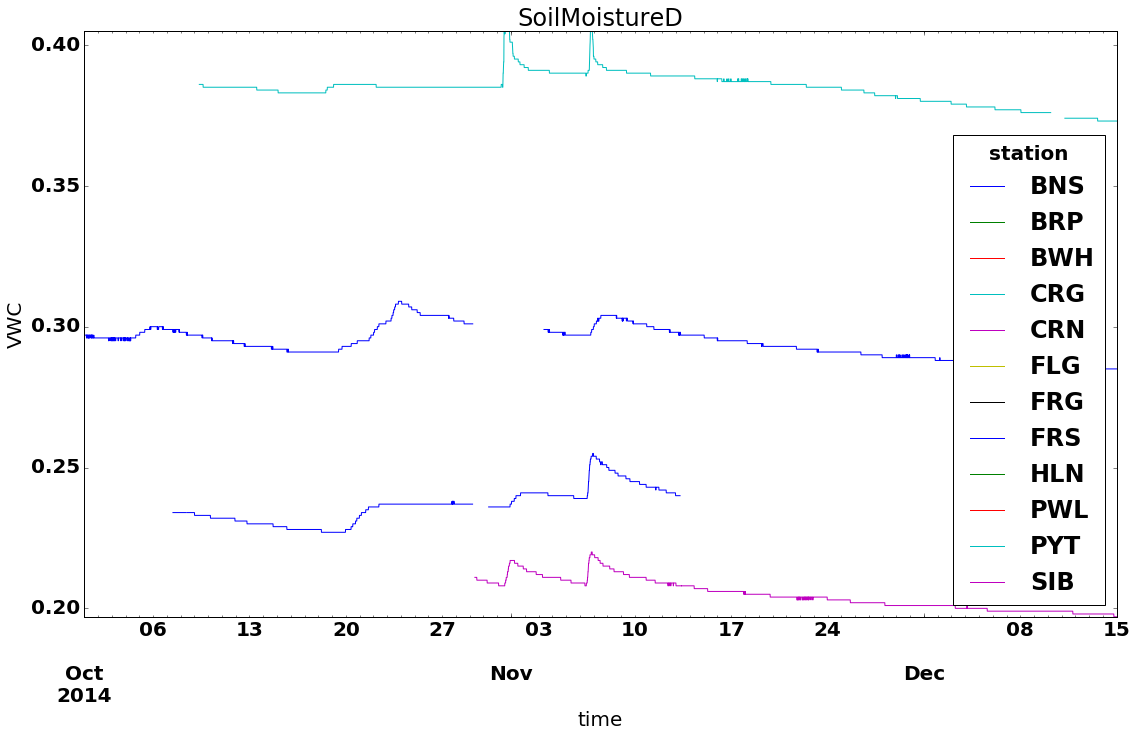

In [ ]:
# Plot each variable (Takes a while, be patient)
#NUM_COLORS = 15
#cm = plt.get_cmap('Set1')
for cvar in AllVars:
    print(cvar)
    pd_temp = CRHO_data[cvar].to_dataframe()
    X = pd_temp.unstack().T
    X.index = X.index.droplevel()
    X.plot()
    #ax = plt.gca()
    #ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    plt.title(cvar)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5,forward=True)
    plt.ylabel(CRHO_data[cvar].attrs['unit'])
    plt.axis("tight");